In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load in reward csv
gt_reward_csv = pd.read_csv("csv/cartpole_gt_ep_rew_mean.csv")
print(len(gt_reward_csv))
gt_reward_csv.head()
#load global step csv to convert from update number to steps
gt_step_csv = pd.read_csv("csv/cartpole_gt_global_step.csv")
print(len(gt_step_csv))
gt_step_csv.head()
gt_reward_csv["Step"] = gt_step_csv[gt_step_csv.columns[1]]

468
468


In [5]:
blip_reward_csv = pd.read_csv("csv/blip_reward.csv")
blip_reward_csv

,Step,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - rollout/ep_gt_rew_mean__MAX,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - rollout/ep_gt_rew_mean__MAX,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - rollout/ep_gt_rew_mean__MAX,...,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - rollout/ep_gt_rew_mean__MAX,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - rollout/ep_gt_rew_mean__MAX,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - rollout/ep_gt_rew_mean__MAX,CartPole_blip-image-captioning-base_cosine_20240425_192124 - rollout/ep_gt_rew_mean,CartPole_blip-image-captioning-base_cosine_20240425_192124 - rollout/ep_gt_rew_mean__MIN,CartPole_blip-image-captioning-base_cosine_20240425_192124 - rollout/ep_gt_rew_mean__MAX
0,0,29.169271,29.169271,29.169271,30.705729,30.705729,30.705729,30.705729,30.705729,30.705729,...,30.992188,29.169271,29.169271,29.169271,30.705729,30.705729,30.705729,30.705729,30.705729,30.705729
1,1,29.197916,29.197916,29.197916,30.226562,30.226562,30.226562,30.445312,30.445312,30.445312,...,30.276041,29.255209,29.255209,29.255209,30.432291,30.432291,30.432291,30.289062,30.289062,30.289062
2,2,28.854166,28.854166,28.854166,29.809896,29.809896,29.809896,29.994791,29.994791,29.994791,...,30.143229,29.440104,29.440104,29.440104,29.726562,29.726562,29.726562,29.807291,29.807291,29.807291
3,3,28.617188,28.617188,28.617188,29.484375,29.484375,29.484375,29.768229,29.768229,29.768229,...,30.312500,29.901041,29.901041,29.901041,29.734375,29.734375,29.734375,29.437500,29.437500,29.437500
4,4,28.687500,28.687500,28.687500,28.940104,28.940104,28.940104,29.307291,29.307291,29.307291,...,29.958334,30.101562,30.101562,30.101562,29.260416,29.260416,29.260416,28.820312,28.820312,28.820312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,910,11.598958,11.598958,11.598958,171.333328,171.333328,171.333328,23.653646,23.653646,23.653646,...,NaN,15.148438,15.148438,15.148438,11.119792,11.119792,11.119792,136.111984,136.111984,136.111984
911,911,11.614583,11.614583,11.614583,172.434891,172.434891,172.434891,25.213541,25.213541,25.213541,...,NaN,13.828125,13.828125,13.828125,11.393229,11.393229,11.393229,132.096359,132.096359,132.096359
912,912,11.546875,11.546875,11.546875,172.838547,172.838547,172.838547,25.677084,25.677084,25.677084,...,NaN,12.825521,12.825521,12.825521,11.466146,11.466146,11.466146,127.638023,127.638023,127.638023
913,913,11.570312,11.570312,11.570312,173.255203,173.255203,173.255203,20.963541,20.963541,20.963541,...,NaN,11.690104,11.690104,11.690104,11.473958,11.473958,11.473958,132.973953,132.973953,132.973953


In [6]:
#load global step csv to convert from update number to steps
blip_step_csv = pd.read_csv("csv/blip_steps.csv")
print(len(blip_step_csv))
# print(len(clip_step_csv.columns)) # num backbones (3) x num reward_funcs (3) x num seeds (2) x csv cols (3) + 1 (step col) = 55
# print(clip_step_csv.columns)
blip_step_csv.head()

915


,Step,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step__MIN,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step__MAX,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step__MIN,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step__MAX,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - global_step,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - global_step__MIN,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - global_step__MAX,...,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step__MAX,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - global_step,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - global_step__MIN,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - global_step__MAX,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - global_step,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - global_step__MIN,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - global_step__MAX,CartPole_blip-image-captioning-base_cosine_20240425_192124 - global_step,CartPole_blip-image-captioning-base_cosine_20240425_192124 - global_step__MIN,CartPole_blip-image-captioning-base_cosine_20240425_192124 - global_step__MAX
0,0,76800,76800,76800,76800,76800,76800,76800,76800,76800,...,76800.0,76800,76800,76800,76800,76800,76800,76800,76800,76800
1,1,80000,80000,80000,80000,80000,80000,80000,80000,80000,...,83200.0,80000,80000,80000,80000,80000,80000,80000,80000,80000
2,2,83200,83200,83200,83200,83200,83200,83200,83200,83200,...,89600.0,83200,83200,83200,83200,83200,83200,83200,83200,83200
3,3,86400,86400,86400,86400,86400,86400,86400,86400,86400,...,96000.0,86400,86400,86400,86400,86400,86400,86400,86400,86400
4,4,89600,89600,89600,89600,89600,89600,89600,89600,89600,...,102400.0,89600,89600,89600,89600,89600,89600,89600,89600,89600


In [7]:
blip_step_csv.drop([col for col in blip_step_csv.columns if 'MAX' in col],axis=1,inplace=True)
blip_step_csv.drop([col for col in blip_step_csv.columns if 'MIN' in col],axis=1,inplace=True)
blip_reward_csv.drop([col for col in blip_reward_csv.columns if 'MAX' in col],axis=1,inplace=True)
blip_reward_csv.drop([col for col in blip_reward_csv.columns if 'MIN' in col],axis=1,inplace=True)

In [8]:
blip_step_csv

,Step,CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step,CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - global_step,CartPole_blip-image-captioning-base_cosine_20240426_154807 - global_step,CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step,CartPole_blip-image-captioning-base_contrastive_20240426_052047 - global_step,CartPole_blip-image-captioning-base_itm_head_20240425_193233 - global_step,CartPole_blip-image-captioning-base_cosine_20240425_192124 - global_step
0,0,76800,76800,76800,76800,76800.0,76800,76800,76800
1,1,80000,80000,80000,80000,83200.0,80000,80000,80000
2,2,83200,83200,83200,83200,89600.0,83200,83200,83200
3,3,86400,86400,86400,86400,96000.0,86400,86400,86400
4,4,89600,89600,89600,89600,102400.0,89600,89600,89600
...,...,...,...,...,...,...,...,...,...
910,910,2988800,2988800,2988800,2988800,NaN,2988800,2988800,2988800
911,911,2992000,2992000,2992000,2992000,NaN,2992000,2992000,2992000
912,912,2995200,2995200,2995200,2995200,NaN,2995200,2995200,2995200
913,913,2998400,2998400,2998400,2998400,NaN,2998400,2998400,2998400


In [9]:
def moving_window_average(data, window_size):
    """Smooth data with moving window average."""
    if window_size <= 1:
        return data
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

In [11]:
import numpy as np
from scipy.interpolate import interp1d

x_values = blip_step_csv['CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step'].values
y_values = blip_reward_csv['CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - rollout/ep_gt_rew_mean'].values
x_values = x_values[~np.isnan(x_values)]
y_values = y_values[~np.isnan(y_values)]
interpolated_function = interp1d(x_values, y_values, kind='cubic')

In [12]:
values_to_sample = blip_step_csv['CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step'].values

In [13]:
y_new = interpolated_function(values_to_sample)

In [14]:
blip_reward_csv['CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - rollout/ep_gt_rew_mean'] = y_new

In [15]:
blip_reward_csv['Step'] = blip_step_csv['CartPole_blip-image-captioning-base_itm_head_20240427_173254 - global_step']

In [16]:
blip_reward_csv.columns

Index(['Step',
       'CartPole_blip-image-captioning-base_itm_head_20240427_173254 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_contrastive_20240426_164200 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_cosine_20240426_154807 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_contrastive_20240426_052047 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_itm_head_20240425_193233 - rollout/ep_gt_rew_mean',
       'CartPole_blip-image-captioning-base_cosine_20240425_192124 - rollout/ep_gt_rew_mean'],
      dtype='object')

In [25]:
def plot(df):
#     df = df.fillna(df.mean())#df.interpolate(method='linear')
    # Define smooth factor (window size), where the window size is 2k+1
    smooth_factor = 1
    plt.figure(figsize=(10, 5))
    
    # calculate mean and std for every 2 seeds per backbone (they have same col name)
    #col_name = f"{backbone}_{reward_func}_ep_gt_rew_mean"
    for reward_func in ["itm_head", "cosine", "contrastive", "goal_baseline_reg"]:
        reward_columns = [col for col in df.columns if reward_func in col]
        means = df[reward_columns].mean(axis=1)
        stds = df[reward_columns].std(axis=1)
    #     stds = np.minimum(stds, np.max(stds)*.4)
        x = df["Step"]
            # Apply smoothing
        smoothed_means = moving_window_average(means, smooth_factor)

        plt.plot(x, smoothed_means, label=f'{reward_func}')
            # Fill between mean ± std
        plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)

        # Plotting env reward
    env_reward = gt_reward_csv["CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean"]
    plt.plot(gt_reward_csv["Step"], env_reward, label="Environment")

        # Labeling the plot
    plt.xlabel('Step')
    plt.ylabel('Episode Reward')
    plt.title(f'BLIP Multimodal Model Reward')
    plt.legend()
    plt.show()

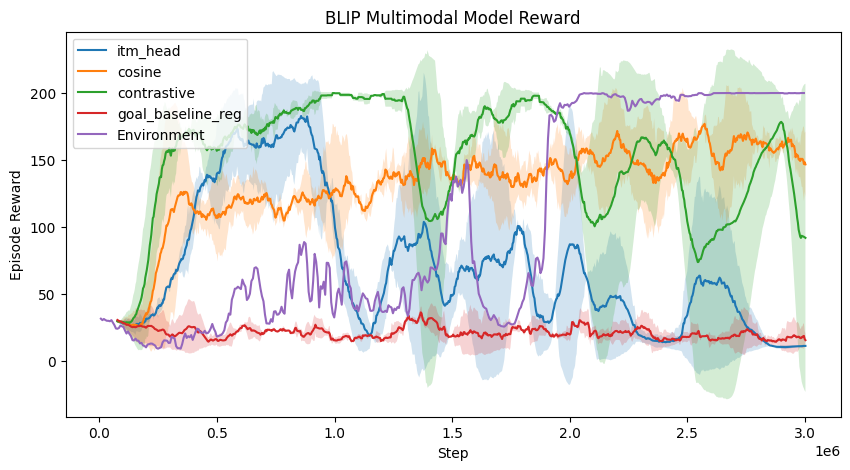

In [26]:
plot(blip_reward_csv)